1.读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。

In [1]:
import pandas as pd
data_path = 'open_rank_20236.csv'
df = pd.read_csv(data_path)

max_value = df['value'].max()
min_value = df['value'].min()
mean_value = df['value'].mean()
median_value = df['value'].median()

print(f"最大值: {max_value}")
print(f"最小值: {min_value}")
print(f"均值: {mean_value}")
print(f"中位数: {median_value}")



最大值: 1394.45
最小值: 200.68
均值: 346.9679
中位数: 273.66999999999996


2.读取data中2022文件夹下的activity_2020文件，分析美国排名前十的项目的平均增长率。

In [12]:
import pandas as pd
data_path = 'activity_2022.csv'
df = pd.read_csv(data_path)

start_value = df['20221_value']
end_value = df['202212_value']
sum = 0

for i in range(len(start_value)):
    sum += (end_value[i] - start_value[i]) / start_value[i]
    rate = sum / len(start_value) * 100

print("{:.2f}%".format(rate))

-4.74%


3.data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。

In [1]:
import pandas as pd
china_df = pd.read_csv('china_2022.csv')
global_df = pd.read_csv('global_2022.csv')

china_data = china_df.describe()
global_data = global_df.describe()

print("中国开源领域数据统计：")
print(china_data)

print("全球开源领域数据统计：")
print(global_data)

中国开源领域数据统计：
       issue_comment    open_issue     open_pull  review_comment  \
count      10.000000     10.000000     10.000000        10.00000   
mean    61205.500000   9169.200000  16912.700000     19857.50000   
std     49332.487917   6810.653563  10068.922805     21115.07349   
min     11741.000000    752.000000   1823.000000      2113.00000   
25%     30943.500000   4625.250000   9376.750000      3120.00000   
50%     39141.000000   6889.500000  15953.000000     10851.00000   
75%     82179.500000  14225.500000  22483.250000     31507.75000   
max    167814.000000  22397.000000  35266.000000     60402.00000   

        merged_pull      rank         value  rankDelta    valueDelta  
count     10.000000  10.00000      10.00000  10.000000     10.000000  
mean   13764.100000   5.50000   40269.53400   5.300000   9265.007000  
std     7692.752064   3.02765   30905.17181   9.944848   5327.824003  
min     1165.000000   1.00000   12033.71000   0.000000   2329.360000  
25%     8067.250000 

4.贝叶斯定理

贝叶斯定理参考：https://zh.wikipedia.org/wiki/%E8%B4%9D%E5%8F%B6%E6%96%AF%E5%AE%9A%E7%90%86

根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。

非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）

工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）

已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？

In [ ]:
# 定义已知概率
tool_component_type_project = 0.5
system_application_type_project = 0.25
content_resource_type_project = 0.25
html_markdown_given_non_software = 0.85
html_markdown_given_software = 0.1
javascript_given_tool_component = 0.35
javascript_given_not_tool_component = 0.1

# 使用全概率公式计算P(HTML/Markdown)
html_markdown = (content_resource_type_project * html_markdown_given_non_software) + \
                  (1 - content_resource_type_project) * html_markdown_given_software

# 使用贝叶斯定理计算P(非软件型项目|带有HTML/Markdown标签)
non_software_given_html_markdown = (content_resource_type_project * html_markdown_given_non_software) / html_markdown

print("该项目是非软件型项目的概率是:", non_software_given_html_markdown)

该项目是非软件型项目的概率是: 0.7391304347826088


5.接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？

In [4]:
javascript = (tool_component_type_project * javascript_given_tool_component) + \
               ((1 - tool_component_type_project) * javascript_given_not_tool_component)

tool_component_given_javascript = (tool_component_type_project * javascript_given_tool_component) / javascript

print("该项目是工具组件型项目的概率是:", tool_component_given_javascript)

该项目是工具组件型项目的概率是: 0.7777777777777778


6.根据以下数据建立可视化无向图

user = [1, 2, 3, 4]

edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

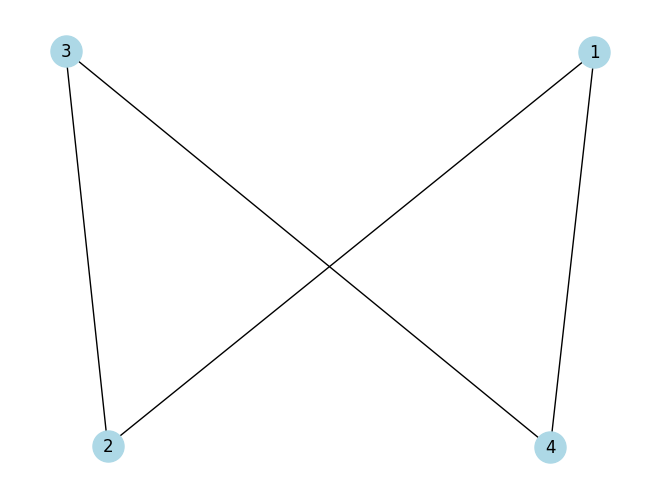

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建一个无向图对象
G = nx.Graph()

# 添加节点
user = [1, 2, 3, 4]
G.add_nodes_from(user)

# 添加边
edge = [(1, 2), (2, 3), (3, 4), (4, 1)]
G.add_edges_from(edge)

# 绘制图形
nx.draw(G, with_labels=True, node_size=500, node_color='lightblue', font_size=12)

# 显示图形
plt.show()

7.根据以下数据建立可视化有向图

users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

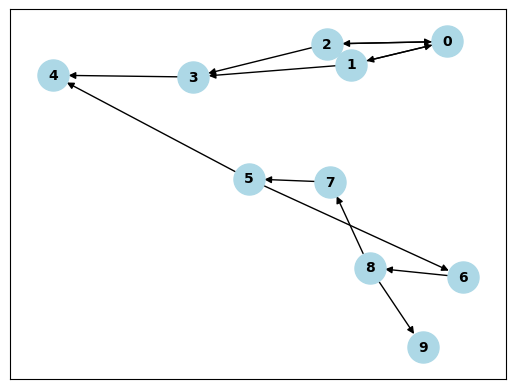

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建有向图对象
G = nx.DiGraph()

# 添加节点
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
G.add_nodes_from(users)

# 添加边
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]
G.add_edges_from(edges)

# 绘制有向图
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_weight='bold', arrows=True)

# 显示图形
plt.show()

8.针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。

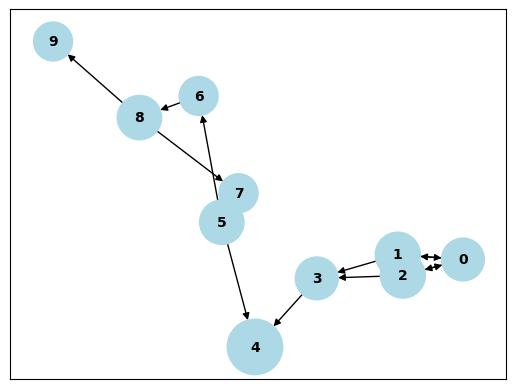

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建有向图对象
G = nx.DiGraph()

# 添加节点
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
G.add_nodes_from(users)

# 添加边
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]
G.add_edges_from(edges)

# 计算PageRank值
page_rank = nx.pagerank(G)

# 根据PageRank值调整节点大小
node_sizes = [10000 * page_rank[node] for node in G.nodes()]

# 绘制有向图
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_size=node_sizes, node_color='lightblue', font_size=10, font_weight='bold', arrows=True)

# 显示图形
plt.show()